In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\rcrds\Downloads\amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [30]:
#1

cross_tab_results = pd.crosstab(df["category"], df["isBestSeller"])
new_df = pd.DataFrame(cross_tab_results).reset_index()
new_df["true_ratio"] = new_df[True]/(new_df[True]+new_df[False])
new_df.sort_values(by="true_ratio", ascending=False).head(5)

isBestSeller,category,False,True,true_ratio
109,Grocery,9008,556,0.058135
254,Smart Home Security & Lighting,98,6,0.057692
126,Health & Personal Care,9017,552,0.057686
185,Mobile Phone Accessories,248,11,0.042471
229,Power & Hand Tools,8353,306,0.035339


In [31]:
#2

from scipy.stats import chi2_contingency


In [36]:
p_value = chi2_contingency(cross_tab_results)[1]
p_value

np.float64(0.0)

In [37]:
from scipy.stats.contingency import association

In [ ]:
c_value = association(cross_tab_results, method = "cramer")
c_value
print("low association")

0.1222829439760564

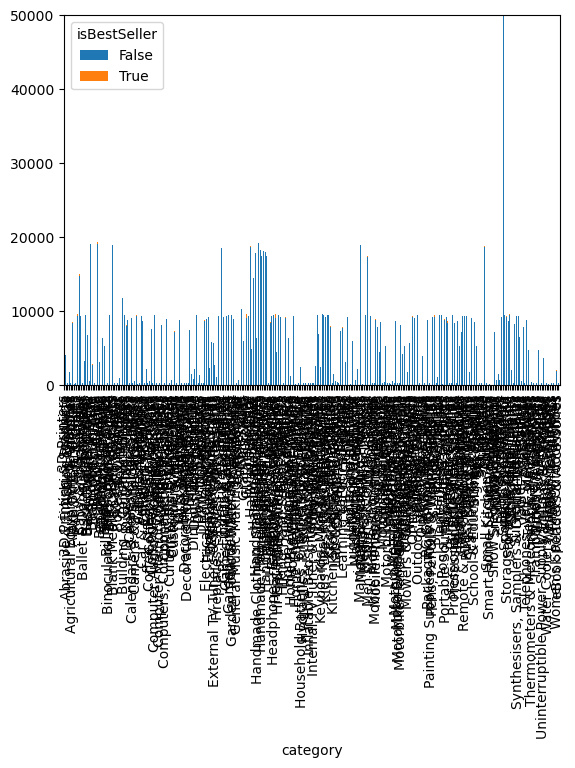

In [49]:
#3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


cross_tab_results.plot(kind="bar", stacked="true")
plt.xlim(0,len(df["category"].unique()))
plt.ylim(0,50000)
plt.show()

In [55]:
#Part 2:

#0

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = list(df["price"][(df["price"] < lower_bound) | (df["price"] > upper_bound)])
outliers

df_no_outl = df[~df["price"].isin(outliers)]
df_no_outl
    

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
#1

top_cat = df_no_outl.category.value_counts().sort_values().tail(20).reset_index()
list_cat = list(top_cat["category"])



In [ ]:

df_no_outl2 = df_no_outl[df_no_outl["category"].isin(list_cat)]
sns.violinplot(data=df_no_outl2, x='category', y='price', palette="coolwarm")

In [ ]:
grouped = df_no_outl.groupby("category")["price"].agg("median").reset_index()
grouped.sort_values(by="price", ascending=False)

,category,price
75,Desktop PCs,74.00
34,Boxing Shoes,69.79
274,Tablets,69.00
108,Graphics Cards,68.54
190,Motherboards,67.92
...,...,...
4,Adapters,7.05
176,Make-up,7.00
246,Signs & Plaques,6.99
8,Arts & Crafts,5.99


In [74]:
#2
top_cat10 = df_no_outl.category.value_counts().sort_values().tail(10).reset_index()
list_cat10 = list(top_cat10["category"])
df_no_outl3 = df_no_outl2[df_no_outl2["category"].isin(list_cat10)]

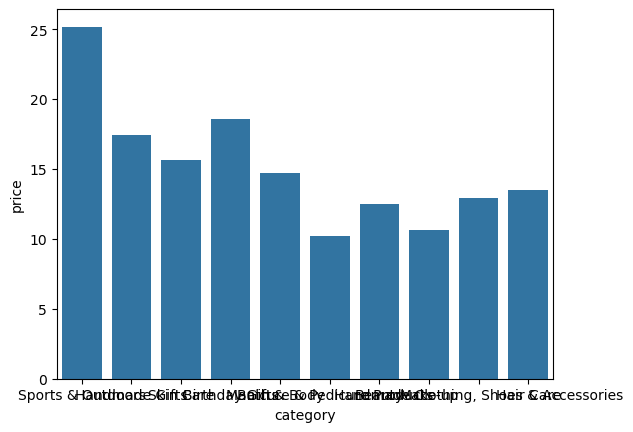

In [75]:
sns.barplot(data = df_no_outl3, x="category", y = "price", estimator = "mean", errorbar=None)
plt.show()

In [ ]:
grouped = df_no_outl.groupby("category")["price"].agg("median").reset_index()
grouped.sort_values(by="price", ascending=False)

,category,price
75,Desktop PCs,74.00
34,Boxing Shoes,69.79
274,Tablets,69.00
108,Graphics Cards,68.54
190,Motherboards,67.92
...,...,...
4,Adapters,7.05
176,Make-up,7.00
246,Signs & Plaques,6.99
8,Arts & Crafts,5.99


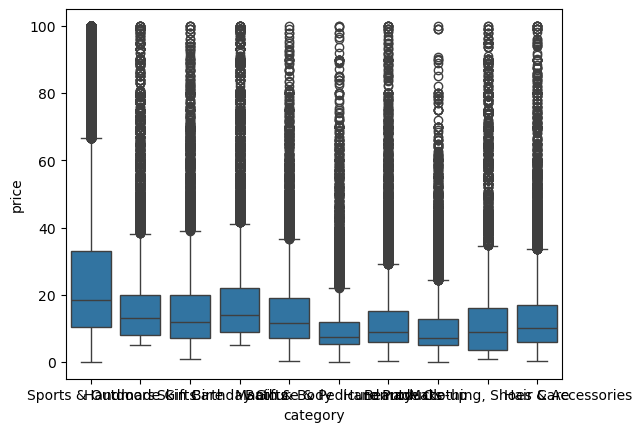

In [77]:
#3

sns.boxplot(data = df_no_outl3, x="category", y = "price")
plt.show()

In [78]:
grouped = df_no_outl.groupby("category")["price"].agg("median").reset_index()
grouped.sort_values(by="price", ascending=False)

,category,price
75,Desktop PCs,74.00
34,Boxing Shoes,69.79
274,Tablets,69.00
108,Graphics Cards,68.54
190,Motherboards,67.92
...,...,...
4,Adapters,7.05
176,Make-up,7.00
246,Signs & Plaques,6.99
8,Arts & Crafts,5.99


In [79]:
#Part 3

#1

correlation1 = df_no_outl['price'].corr(df_no_outl['stars'])

correlation2 = df_no_outl['price'].corr(df_no_outl['stars'], method='spearman')

correlation1,correlation2

(np.float64(-0.07767299878181444), np.float64(-0.06679697280768455))

In [80]:
print("No, very weak correlation. NEar 0")

No, very weak correlation. NEar 0


<Axes: xlabel='price', ylabel='stars'>

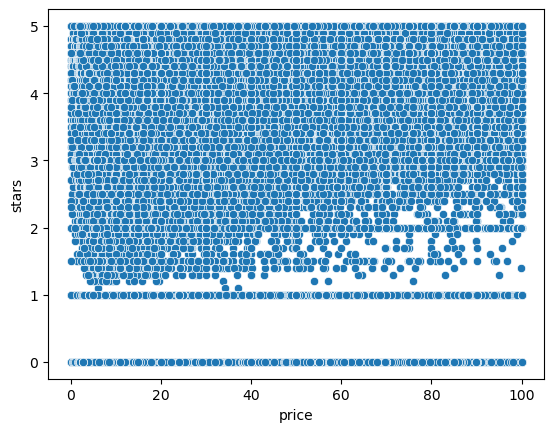

In [82]:
#2
sns.scatterplot(data = df_no_outl, y = "stars", x = "price")

In [ ]:
print("Nearly no values between 0 and 1, a few between 1 and 2 and many in between 2 and 3, 3 and 4 and 4 and 5")

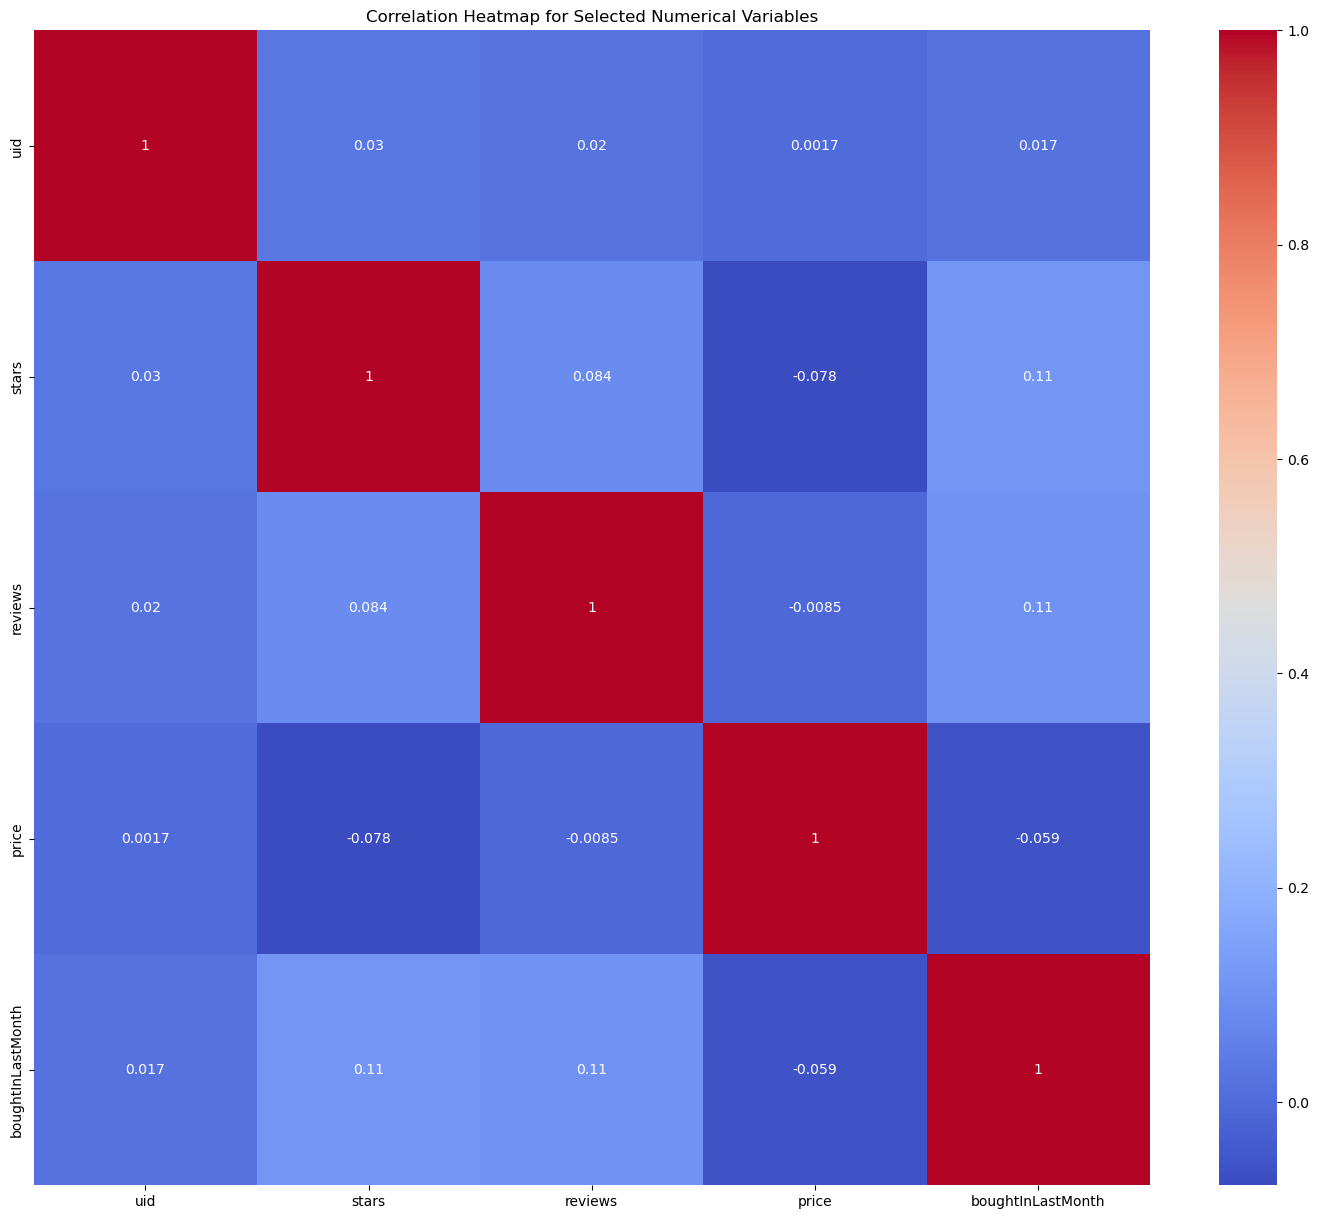

In [85]:
potential_categorical_from_numerical = df_no_outl.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
df_numerical = df_no_outl.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
correlation_matrix = df_numerical.corr()

correlation_matrix = df_numerical.corr()
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

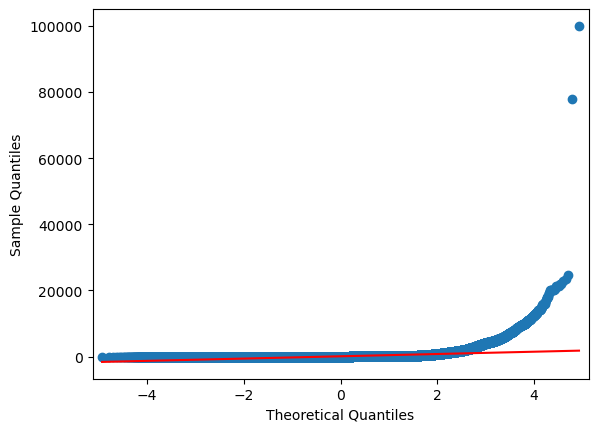

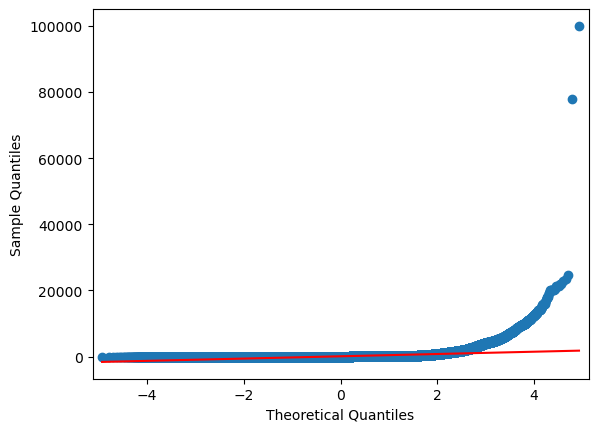

In [86]:
import statsmodels.api as sm

sm.qqplot(df['price'], line='s')

In [87]:
#BONUS

#1

top_cat = df.category.value_counts().sort_values().tail(20).reset_index()
list_cat = list(top_cat["category"])


C:\Users\rcrds\AppData\Local\Temp\ipykernel_7240\2095858788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_no_outl2, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

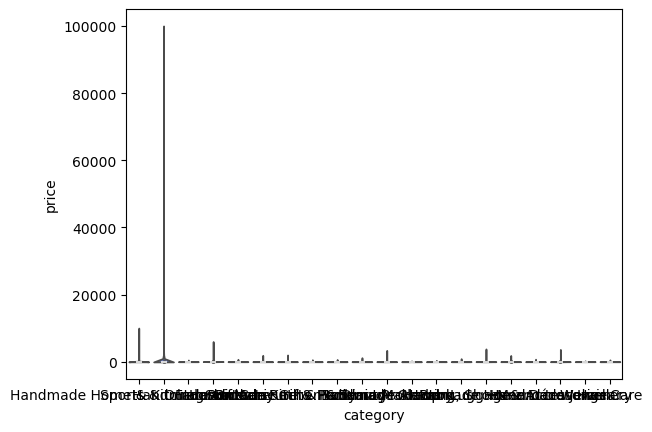

In [88]:
df_no_outl2 = df[df["category"].isin(list_cat)]
sns.violinplot(data=df_no_outl2, x='category', y='price', palette="coolwarm")

In [89]:
grouped = df.groupby("category")["price"].agg("median").reset_index()
grouped.sort_values(by="price", ascending=False)

,category,price
165,Laptops,1042.725
75,Desktop PCs,810.400
260,Snowboards,366.725
134,Home Audio Record Players,326.080
0,3D Printers,319.000
...,...,...
4,Adapters,7.050
176,Make-up,7.000
246,Signs & Plaques,6.990
8,Arts & Crafts,5.990


In [ ]:
print("top categories changed a lot. Highest categories had meaningfull outliers like laptop that have high prices")

In [94]:
#2
top_cat10 = df.category.value_counts().sort_values().tail(10).reset_index()
list_cat10 = list(top_cat10["category"])
list_cat10


['Fragrances',
 'Hair Care',
 'Make-up',
 'Skin Care',
 'Manicure & Pedicure Products',
 'Birthday Gifts',
 'Bath & Body',
 'Handmade Clothing, Shoes & Accessories',
 'Beauty',
 'Sports & Outdoors']

In [ ]:

df3 = df[df["category"].isin(list_cat10)]

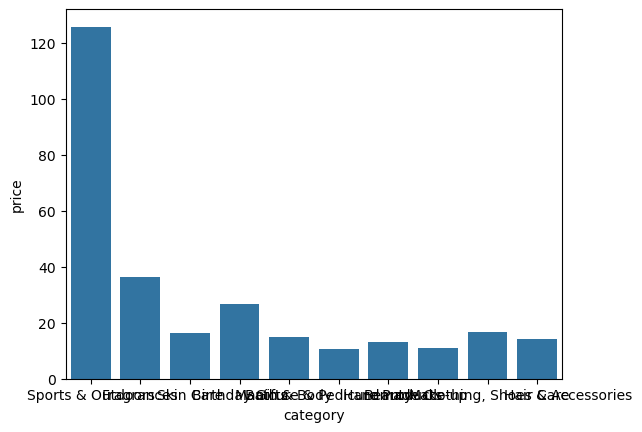

In [93]:
sns.barplot(data = df3, x="category", y = "price", estimator = "mean", errorbar=None)
plt.show()

In [ ]:
print("most frequent categories didnt change much")

In [95]:
grouped = df.groupby("category")["price"].agg("median").reset_index()
grouped.sort_values(by="price", ascending=False)

,category,price
165,Laptops,1042.725
75,Desktop PCs,810.400
260,Snowboards,366.725
134,Home Audio Record Players,326.080
0,3D Printers,319.000
...,...,...
4,Adapters,7.050
176,Make-up,7.000
246,Signs & Plaques,6.990
8,Arts & Crafts,5.990


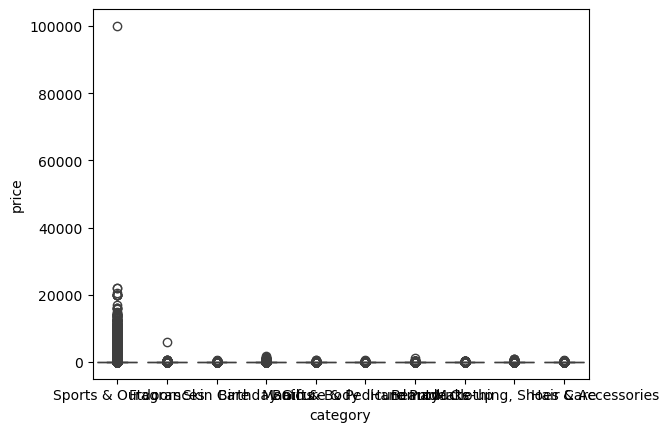

In [96]:
#3
sns.boxplot(data = df3, x="category", y = "price")
plt.show()

In [ ]:
print("now it's hard to read the graph")

In [ ]:
grouped = df.groupby("category")["price"].agg("median").reset_index()
grouped.sort_values(by="price", ascending=False)

In [97]:
#Part 3

#1

correlation1 = df['price'].corr(df_no_outl['stars'])

correlation2 = df['price'].corr(df_no_outl['stars'], method='spearman')

correlation1,correlation2

(np.float64(-0.07767299878181444), np.float64(-0.06679697280768455))

In [ ]:
print("correlations continue to be weak near 0")

<Axes: xlabel='price', ylabel='stars'>

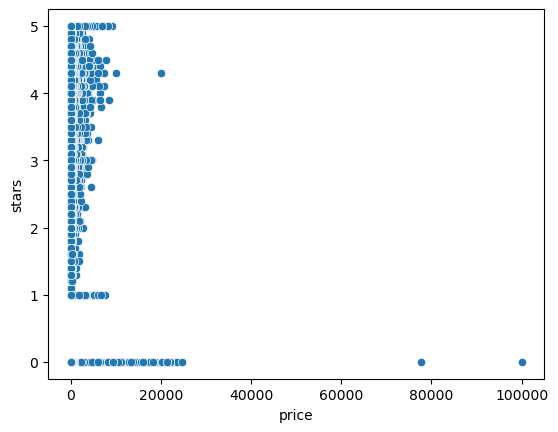

In [98]:
#2
sns.scatterplot(data = df, y = "stars", x = "price")

In [ ]:
print("price range increaser a lot stretching the graph due to outliers")

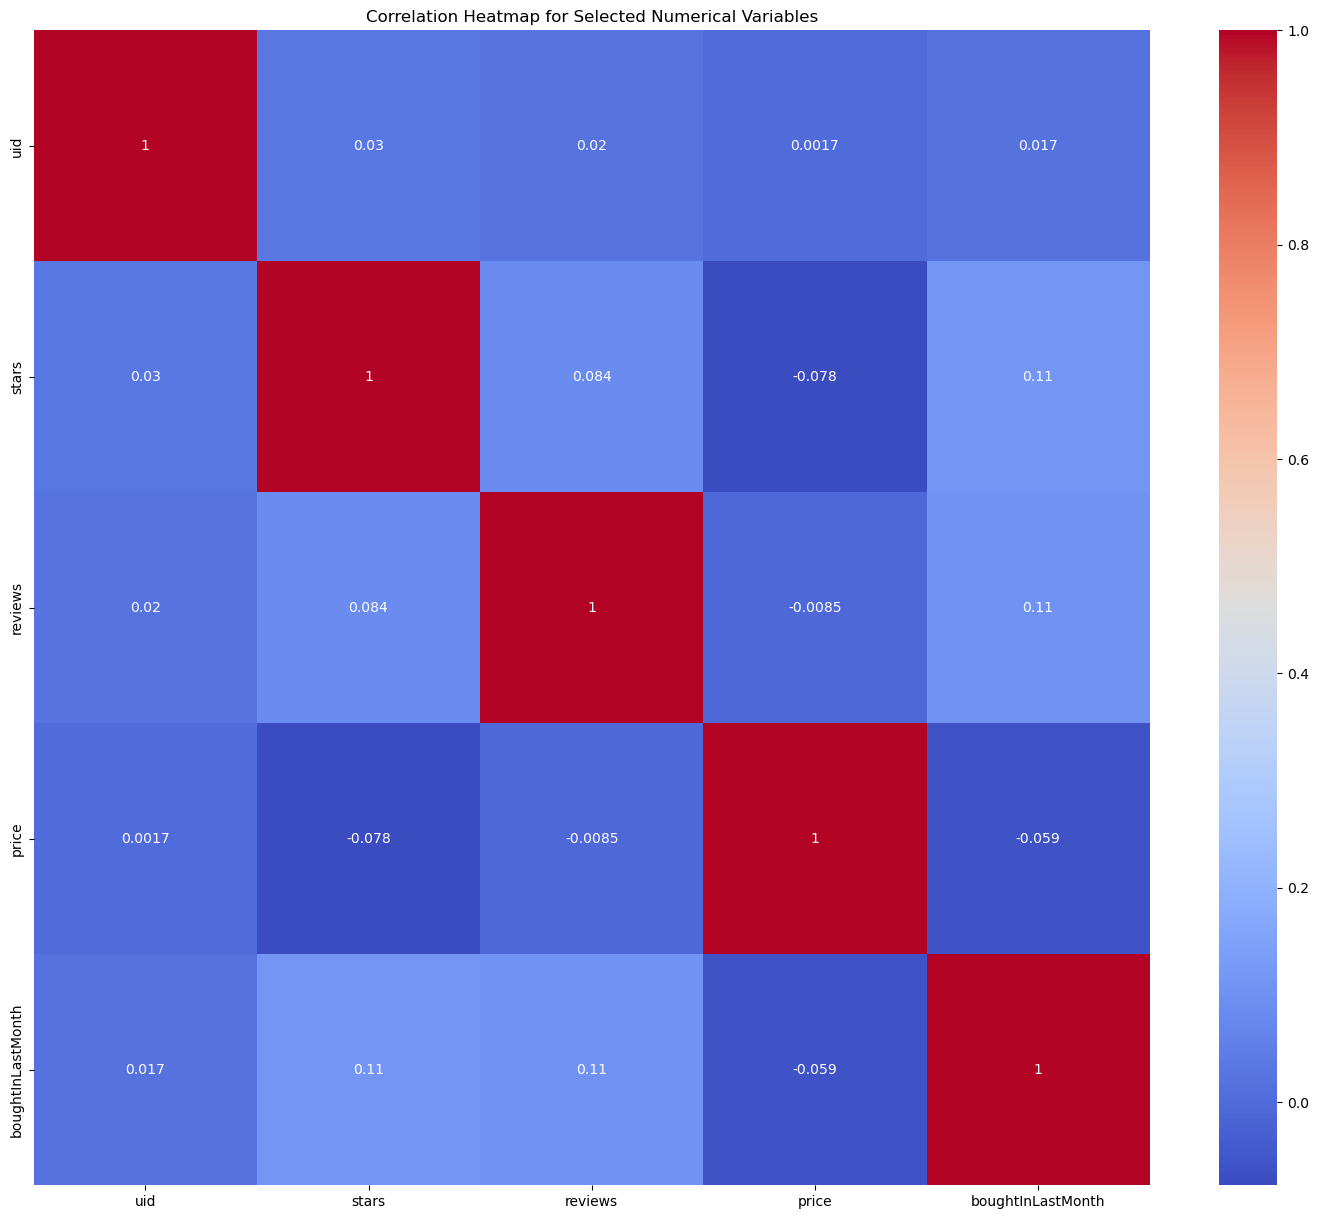

In [99]:
potential_categorical_from_numerical = df_no_outl.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
df_numerical = df_no_outl.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
correlation_matrix = df_numerical.corr()

correlation_matrix = df_numerical.corr()
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

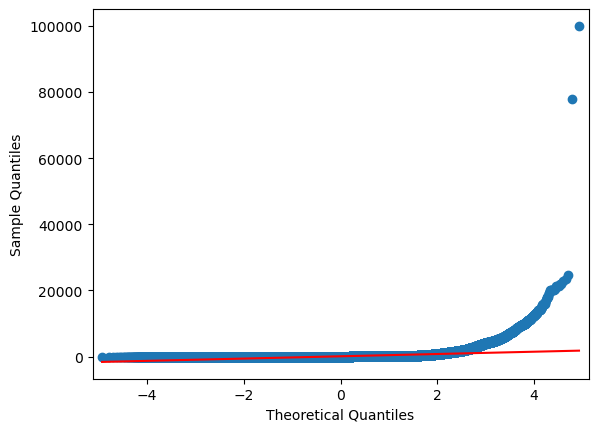

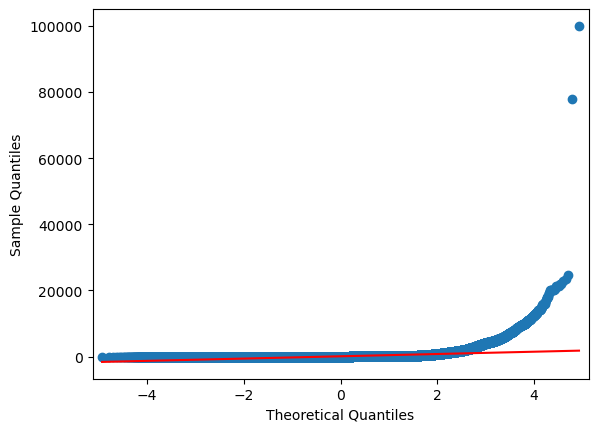

In [100]:
import statsmodels.api as sm

sm.qqplot(df['price'], line='s')